## This is a basic demo of going from data to a network using the functions in utilities.py

In [10]:
import datetime
import os
%run -i ../src/utilities.py

In [2]:
DATASET_NAME = "Okimflemingiae_DD_RPKM"

In [5]:
view_data_toc()

,Process,Condition,Sampling Frequency,Sampling Duration,Dataset,Type,PMID
Organism,,,,,,,
Saccharomyces cerevisiae,Cell Cycle,Wild-type replicate 1,16 min,254 min,Scerevisiae_WT_r1_Microarray,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,Wild-type replicate 2,16 min,262 min,Scerevisiae_WT_r2_Microarray,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,Wild-type,5 min,245 min,Scerevisiae_RNAseq,RNAseq,27918582
Saccharomyces cerevisiae,Cell Cycle,No APC activity replicate 1,20 min,300 min,Scerevisiae_noAPC_r1,Microarray,25200947
Saccharomyces cerevisiae,Cell Cycle,No APC activity replicate 2,20 min,360 min,Scerevisiae_noAPC_r2,Microarray,25200947
Saccharomyces cerevisiae,Cell Cycle,No cyclin-CDK activity replicate 1,16 min,262 min,Scerevisiae_noCDK_r1,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,No cyclin-CDK activity replicate 2,16 min,254 min,Scerevisiae_noCDK_r2,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,DNA Damage Checkpoint activated replicate 1,Uneven,260 min,Scerevisiae_DRC_r1,Microarray,25200947
Saccharomyces cerevisiae,Cell Cycle,DNA Damage Checkpoint activated replicate 2,Uneven,260 min,Scerevisiae_DRC_r2,Microarray,25200947


### Loading data in and how to check and handle duplicate gene names

In [6]:
# This function loads a dataset into a datafame. The dataset name is taken from the "Dataset" column of the Dataset Table of Contents (printed above ^^)
data_df = load_dataset(DATASET_NAME)
data_df.head() # <-- adding .head() allows you to view the top few rows of a dataframe

,4,8,12,16,20,24,28,32,36,40,44,48
time_points,,,,,,,,,,,,
Ophio5|1000,15.978522,19.222255,8.462312,17.608235,8.608888,1.610910,15.484599,15.877299,12.206973,16.300000,3.520457,5.116088
Ophio5|1001,275.267059,343.781882,108.561150,343.914350,102.521979,41.899832,169.682988,245.963367,125.302082,290.829506,69.910771,86.104409
Ophio5|1002,11.645763,9.666387,22.475157,13.059055,28.198244,73.443188,9.885276,8.217323,9.647158,8.562906,27.637694,18.390368
Ophio5|1003,0.000000,0.062734,0.000000,0.000000,0.069775,0.000000,0.000000,0.076594,0.000000,0.000000,0.000000,0.134604
Ophio5|1004,16.833148,8.774343,52.811643,28.628546,53.999905,182.167032,17.377108,8.284545,16.313668,14.244907,70.909921,35.560886


In [7]:
# Use this function on your dataframe to see if the data contains any duplicate gene names. Having duplicate gene names will cause headaches later in your analyses.
duplicate_check(data_df)

This dataset has no duplicate gene names.


True

### Running periodicity algorithms on a dataset

In [19]:
SPEED_UP_FACTOR = 10

dataset = data_df#.head(100)
min_period = 23
max_period = 25
period_step = 1
avg_period = 24
filename = DATASET_NAME
numb_reg=1000000 // SPEED_UP_FACTOR
numb_per=100000 // SPEED_UP_FACTOR
return_results=False
num_proc=5

datetimestr = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
data_path = f'../tmp/{filename}__{datetimestr}.tsv'
dataset.to_csv(data_path, sep='\t')

print('Running pyDL')
pydl_results_path = run_pydl(data_path, avg_period, data_path, numb_reg=numb_reg, numb_per=numb_per, return_results=return_results, is_tmp=True, num_proc=num_proc)

os.remove(data_path)

Running pyDL
-- Running pyDL on dataset, testing a period of 24
-- Command used: mpiexec -n 5 python ../src/pydl/pydl.py ../tmp/Okimflemingiae_DD_RPKM__20251016180422.tsv -T 24 -o ../results/Okimflemingiae_DD_RPKM__20251016180422_pydl_p24.tsv -r 100000 -p 10000 -l True -v False
-- Results saved as Okimflemingiae_DD_RPKM__20251016180422_pydl_p24.tsv in the results directory


In [20]:
pydl_results_path = "Okimflemingiae_DD_RPKM__20251016180422_pydl_p24.tsv"

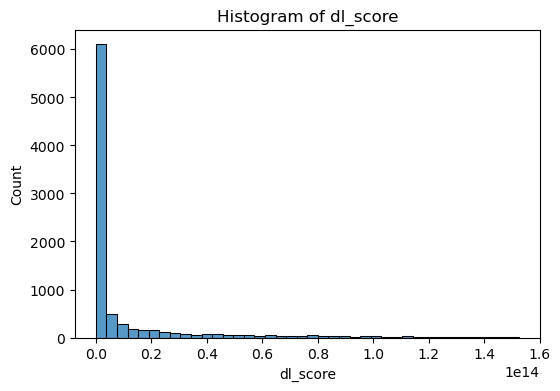

In [21]:
plot_periodicity_histogram(pydl_results_path, 'dl_score', bins=40)
plt.show()

### Visualizing gene expression

In [23]:
TOP_N = 20

Loading periodicity results


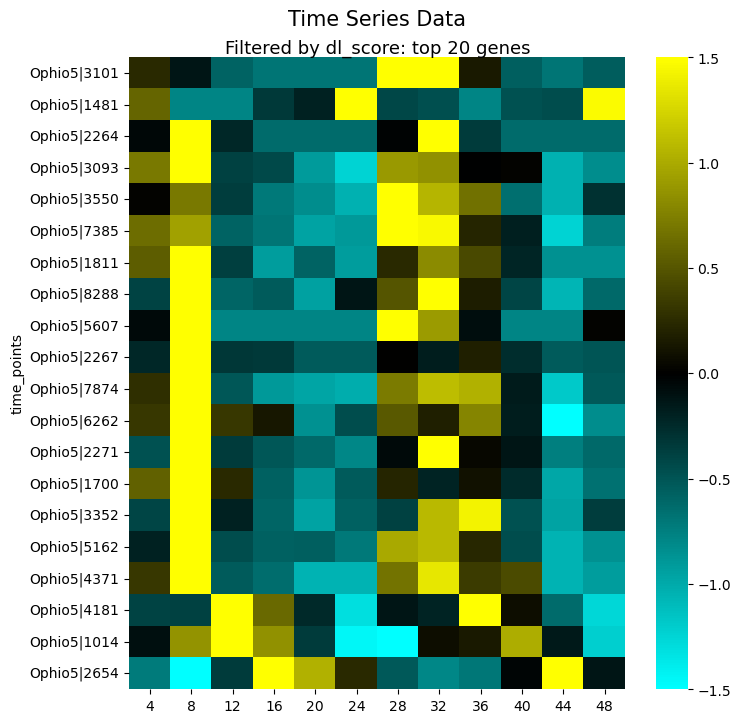

In [24]:
# I would like to view the top 6 genes that pyJTK has ranked as the most periodic in a heatmap. I want to order genes based on their peak expression BEFORE 96 minutes.
plot_heatmap(dataset, pydl_results_path, 24, 'dl_score', top_genes=TOP_N)

Loading periodicity results


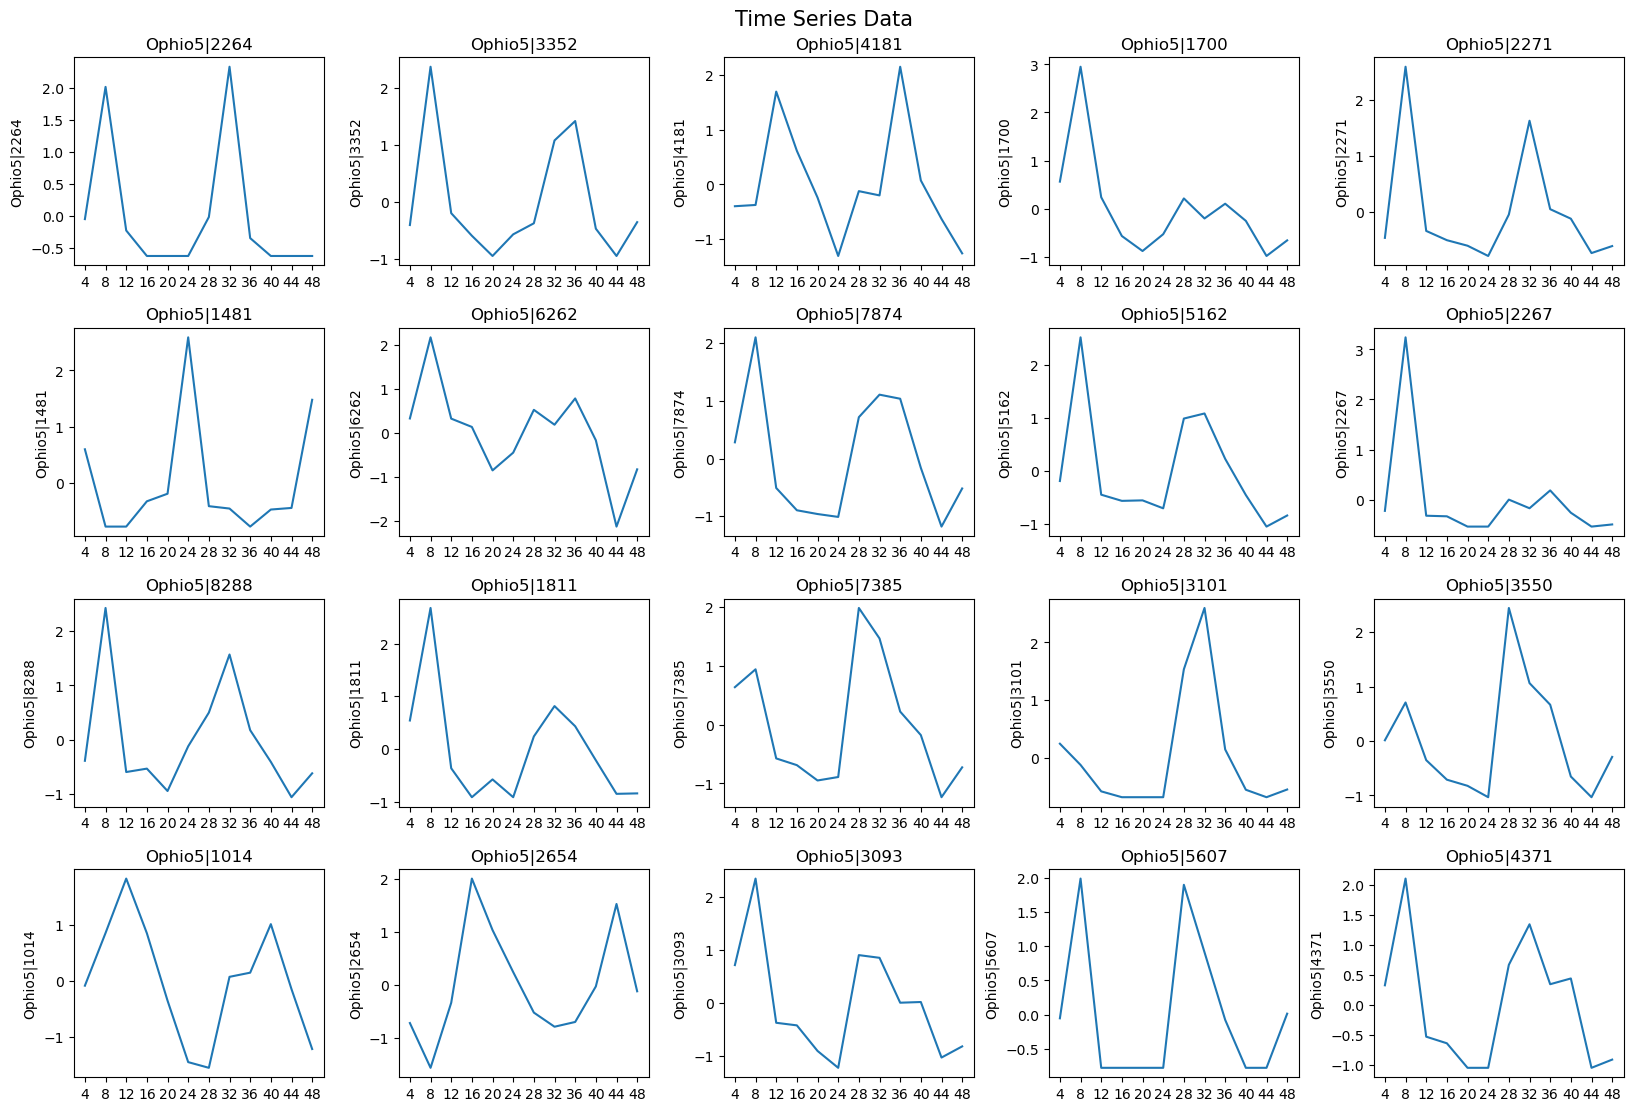

In [25]:
# I also want to inspect their gene expression profiles in a line graph.
# I use this function to just return the gene names from this thresholding method
gene_list = get_genelist_from_top_n_genes(pydl_results_path, 'dl_score', TOP_N)
# I then supply that list, along with the dataframe, to plot the line graphs. I want to normalize the expression of each gene via z-score transformation.
plot_linegraphs_from_gene_list(dataset, gene_list, norm_data=True)

### Applying LEMpy and visualizing networks

In [11]:
# I now want to use LEM to infer regulatory relationships between a set of regulators and targets.
# For the sake of demoing, I have created arbitrary gene lists of targets, repressors and activators.
# Note, these lists can overlap in what genes they contain. That is prefectly fine.
targets_list = ['SWI4','NRM1', 'MCM1', 'YOX1', 'FOX2', 'PLM2',  'SWI5', 'ACE2', 'ACT1']
repressors_list = ['SWI4','NRM1', 'MCM1', 'YOX1']
activators_list = ['YOX1', 'FOX2', 'PLM2',  'SWI5', 'ACE2', 'ACT1']

In [12]:
# LEMpy requires a dataset, lists of targets, repressors and activators, and something to name the results. Here I used the same filename as before in the periodicity section.
all_scores_df = run_lem(demo_df, targets_list, repressors_list, activators_list, 'yeast_ma_demo')

-- Running LEMpy on dataset ../tmp/tmp_20251016142554.tsv
-- Command used: mpiexec -n 2 python ../src/lempy/lempy.py ../results/yeast_ma_demo__20251016142554_lempy/lempy_20251016142554_config.txt
-- Results saved in ../results/yeast_ma_demo__20251016142554_lempy


In [1]:
# LEMpy's output is a ranking of all the regulatory relationships (or edges) but I am only interested in the top 10 edges for building a network.
# The network produced is interactive so you can move the nodes/genes around. If you know the order of how the genes are expressed, try rearranging
# the nodes in the network in the same order!
# NOTE: To view the network, you must rerun all the cells in this notebook and then this cell.
make_top_edge_network(all_scores_df, 10)

NameError: name 'make_top_edge_network' is not defined